In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

url='https://drive.google.com/file/d/12dUeEO_rkButPD79pOteFoSSeuIBg5qt/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dataset = pd.read_csv(dwn_url)

# About The Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (**FAVC**), Frequency of consumption of vegetables (**FCVC**), Number of main meals (**NCP**), Consumption of food between meals (**CAEC**), Consumption of water daily (**CH20**), and Consumption of alcohol (**CALC**). The attributes related with the physical condition are: Calories consumption monitoring (**SCC**), Physical activity frequency (**FAF**), Time using technology devices (**TUE**), Transportation used (**MTRANS**)
variables obtained :
**Gender**, **Age**, **Height** and **Weight**.

**NObesity** values are:

* Underweight
* Normal
* Overweight
* Obesity I
* Obesity II
* Obesity III

In [ ]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset_training = dataset[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset[int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE):]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

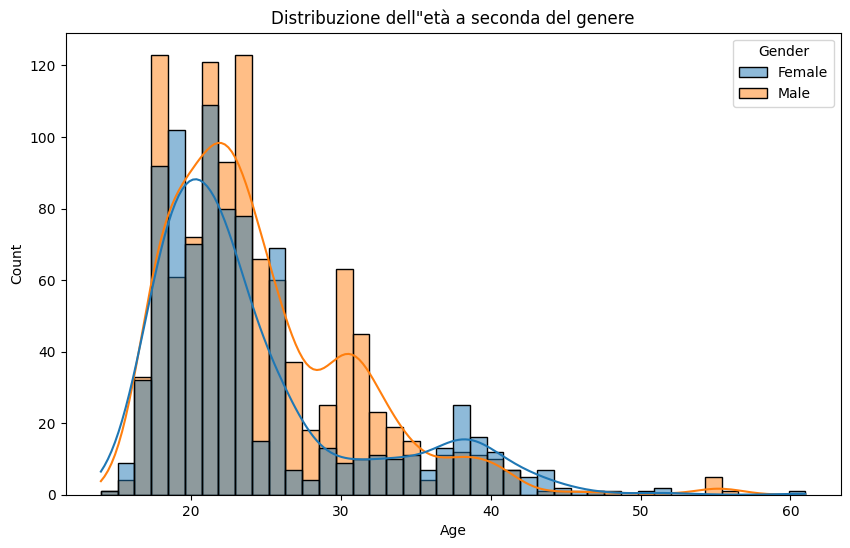

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset_training, x="Age", kde=True, hue="Gender")
plt.title("Distribuzione dell\"età a seconda del genere")
plt.show()

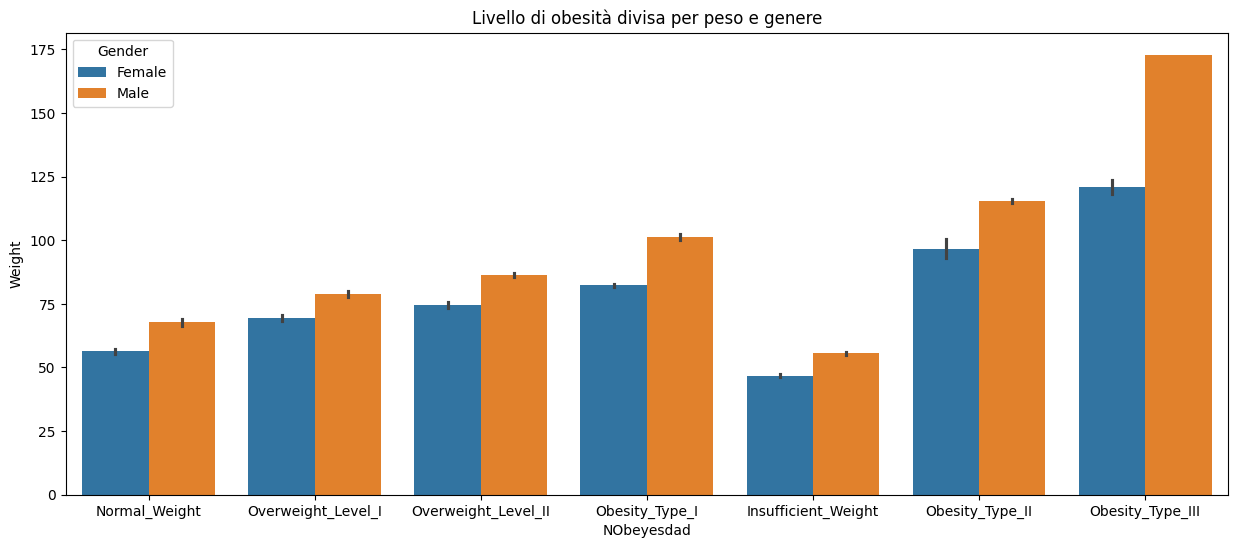

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=dataset_training, x="NObeyesdad", y="Weight", hue="Gender")
plt.title("Livello di obesità divisa per peso e genere")
plt.show()

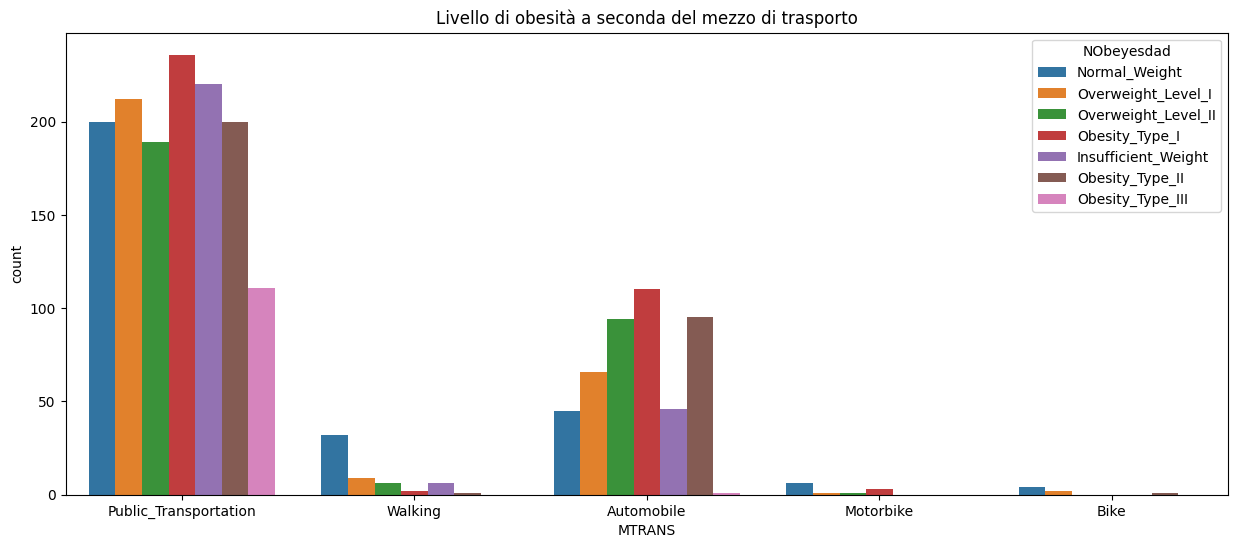

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training, x="MTRANS", hue="NObeyesdad")
plt.title("Livello di obesità a seconda del mezzo di trasporto")
plt.show()

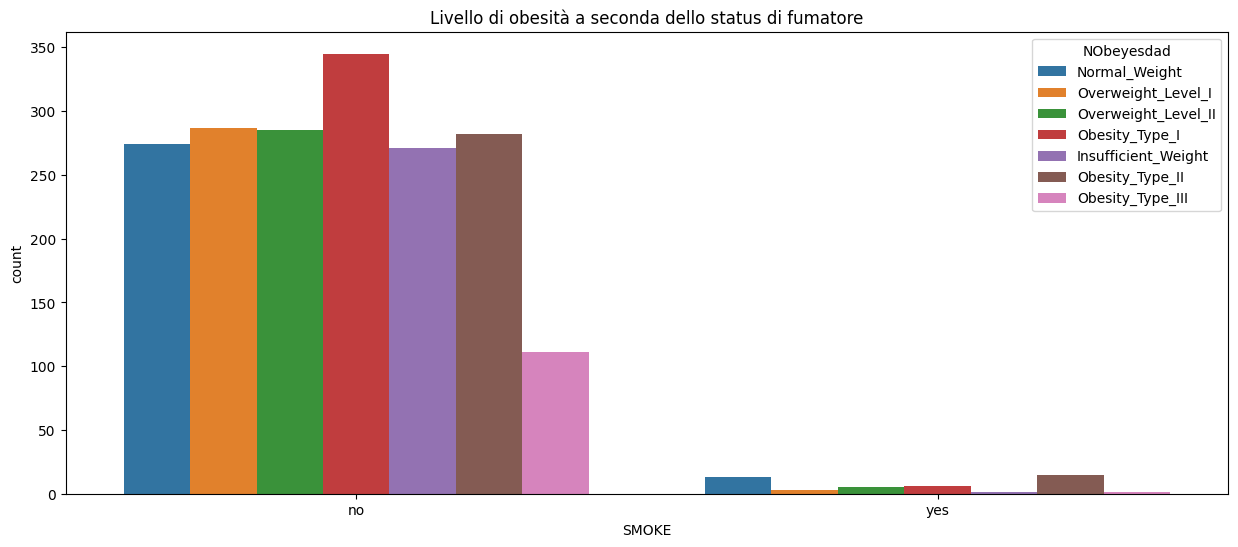

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training, x="SMOKE", hue="NObeyesdad")
plt.title("Livello di obesità a seconda dello status di fumatore")
plt.show()

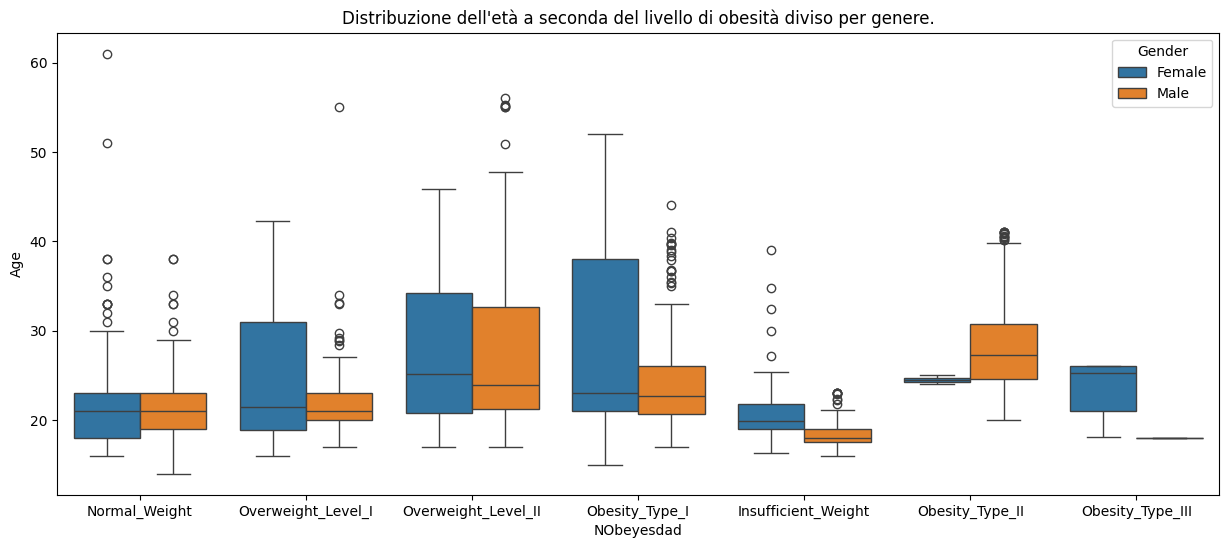

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset_training, x="NObeyesdad", y="Age", hue="Gender")
plt.title("Distribuzione dell'età a seconda del livello di obesità diviso per genere.")
plt.show()

# Manipolazione dei dati
Qui viene eseguita la preparazione dei dati per il training e il test dei modelli di machine learning. Sono state svolte le seguenti operazioni:

1. Conversione delle variabili categoriche in formato numerico.
2. Funzione di normalizzazione dei dati numerici, utilizzata per il miglioramento delle prestazioni negli algoritmi di gradient descent e rete neurale e per evitare che feature con scale di valori maggiori delle altre dominino l'addestramento.
3. Randomizzazione delle righe del dataset.
4. Suddivisione del dataset in training set e test set.
5. Preparazione dei dati per i modelli di regressione e classificazione.
6. Aggiunta una colonna di bias a entrambi i set di dati per modelli di regressione.
7. Arrotondamento dei dati per l'uso nel modello di classificazione Decision Tree.

Per la misurazione delle performance sono stati utilizzati il Root Mean Square Error per i modelli di regressione e l'Accuracy, con i valori di precision e recall, per i modelli di classificazione, insieme alla stima del tempo impiegato nella fase di training.


In [ ]:
import math
import time
import heapq
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, confusion_matrix, roc_curve, auc, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model, metrics
import itertools

data = dataset.copy()

data['Gender'] = data['Gender'].replace({'Female':1, 'Male':0})
data['family_history_with_overweight'] = data['family_history_with_overweight'].replace({'yes':1, 'no':0})
data['FAVC'] = data['FAVC'].replace({'yes':1, 'no':0})
data['CAEC'] = data['CAEC'].replace({'Always':3, 'Frequently':2, 'Sometimes':1, 'no':0})
data['SMOKE'] = data['SMOKE'].replace({'yes':1, 'no':0})
data['SCC'] = data['SCC'].replace({'yes':1, 'no':0})
data['CALC'] = data['CALC'].replace({'Always':3, 'Frequently':2, 'Sometimes':1, 'no':0})
data['MTRANS'] = data['MTRANS'].replace({'Walking':0, 'Public_Transportation':2, 'Motorbike':3, 'Automobile':4, 'Bike':1})
data['NObeyesdad'] = data['NObeyesdad'].replace({'Normal_Weight':0, 'Overweight_Level_I':0, 'Overweight_Level_II':0, 'Obesity_Type_I':1, 'Obesity_Type_II':1, 'Obesity_Type_III':1, 'Insufficient_Weight':0})


# Normalizing function
def normalize(df):
  norm_df=pd.DataFrame()
  for column in df.columns:
    avg=df[column].mean()
    devstd=df[column].std()
    norm_df[column]=(df[column]-avg)/devstd
    if devstd==0:
      norm_df[column]=df[column]
  return norm_df


# Randomize rows
temp = data.sample(frac=1).reset_index(drop=True)
data = temp

# Split data into training set and test set
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
data_training = data[:int(len(data) * TRAIN_TEST_SPLIT_PERCENTAGE)]
data_test = data[int(len(data) * TRAIN_TEST_SPLIT_PERCENTAGE):]

# Regression models data
X_columns = [0, 1, 2, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13, 14, 15, 16]
X_train = data_training.iloc[:, X_columns]
Y_train = data_training.iloc[:, 3]

X_train_norm = normalize(X_train)
X_train_norm['bias'] = 1

X_test = data_test.iloc[:, X_columns]
Y_test = data_test.iloc[:, 3]

# Normalized data
X_test_norm = normalize(X_test)
X_test_norm['bias'] = 1



# Classification models
x_test_class = data_test.iloc[:, :16]
y_test_class = data_test.iloc[:, 16:]

x_train_class = data_training.iloc[:, :16]
y_train_class = data_training.iloc[:, 16:]

x_log = normalize(x_train_class)
x_log_test = normalize(x_test_class)

x_log['bias'] = 1
x_log_test['bias'] = 1

# Rounding data for the classification Decision tree
data_training_round = data_training.copy()
data_training_round['Weight'] = data_training_round['Weight'].round().astype(int)
data_training_round['Height'] = data_training_round['Height'].round(1)
data_training_round['Age'] = data_training_round['Age'].round().astype(int)

data_test_round = data_test.copy()
data_test_round['Weight'] = data_test_round['Weight'].round().astype(int)
data_test_round['Height'] = data_test_round['Height'].round(1)
data_test_round['Age'] = data_test_round['Age'].round().astype(int)



# Implementazione regressione lineare
Di seguito viene presentata l'implementazione di una funzione di regressione lineare Questa implementazione utilizza la formula della regressione lineare basata sulla minimizzazione dell'errore quadratico medio (MSE) attraverso l'inversione della matrice.

In [ ]:
def linear_reg(X_train, Y_train):
  # X^T
  X_t = X_train.T
  # X^T * X
  XTX = np.dot(X_t, X_train)
  # (X^T * X)^-1
  XTX_inv = np.linalg.inv(XTX)
  # (X^T * X)^-1 * X^T
  XTX_inv_XT = np.dot(XTX_inv, X_t)
  # (X^T * X)^-1 * X^T * Y
  C = np.dot(XTX_inv_XT, Y_train)
  return C

def predict_linear_reg(X_test, C):
  Y_pred = np.dot(X_test, C)
  return Y_pred

# Test del modello

In [ ]:
start_time = time.time()
c_lin_reg = linear_reg(X_train_norm, Y_train)
end_time = time.time()
training_time_mat = end_time - start_time

Y_pred = predict_linear_reg(X_test_norm, c_lin_reg)

# MSE
mse = mean_squared_error(Y_test, Y_pred)
rmse_mat = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
print("Training Time: ", training_time_mat)

Root Mean Squared Error (RMSE): 12.65647490804609
Training Time:  0.004649162292480469


# Implementazione decision tree basata su dizionari

Nel seguito viene implementato un Decision Tree basato sull'uso dei dizionari, che utilizza l'information gain come criterio di suddivisione. Questa implementazione non richiede la specifica dell'altezza dell'albero o del branching factor come iperparametri. Ciò rende l'implementazione più semplice e diretta, facilitando l'addestramento e permettendo ai dati di adattarsi meglio senza introdurre vincoli. Tuttavia, questa flessibilità potrebbe portare ad overfitting, in quanto vengono create numerose suddivisioni molto specifiche (per limitare un minimo questo problema sono stati anche arrotondati i valori di età, altezza e peso), e anche la complessità spaziale può aumentare.

In [ ]:
# Entropy function
def entropy(df, target):
  if (len(df[target].unique())==1):
    return 0

  p=df[target].mean()
  return -p*math.log2(p)-(1-p)*math.log2(1-p)

# Remainder function
def remainder(df,attribute,target):
  rem=0
  part=df.groupby(attribute)
  for value,group in part:
    rem+=(group.shape[0]/df.shape[0])*entropy(group,target)
  return rem

# Gain function
def gain(df,a,target):
  info_gain = entropy(df,target)-remainder(df,a,target)
  return info_gain

# Create decision tree function
def create_decision_tree(dataset, df, attributes, target, parent):

  counts = np.unique(df[target], return_counts = True)
  target_values = np.unique(dataset[target])

  # "Pure" node
  if len(target_values) <= 1:
    return target_values[0]

  # Empty dataset
  elif len(dataset) == 0:
    # Most frequent value
    return target_values[np.argmax(counts[1])]

  # All attributes already used
  elif len(attributes) == 0:
    return parent

  else:
    parent = target_values[np.argmax(counts[1])]
    # Call gain function
    item_values = [gain(dataset, attribute, target) for attribute in attributes]
    # Search the best attribute
    optimum_attribute_index = np.argmax(item_values)
    optimum_attribute = attributes[optimum_attribute_index]
    decision_tree = {optimum_attribute:{}}
    attributes = [i for i in attributes if i != optimum_attribute]

    for value in np.unique(dataset[optimum_attribute]):
      # Select data with the same value of the current optimum_attribute
      min_data = dataset.where(dataset[optimum_attribute] == value).dropna()
      # Recursively split (or not) selected data
      min_tree = create_decision_tree(min_data, df, attributes, target, parent)
      # Add the subtree to the decision_tree
      decision_tree[optimum_attribute][value] = min_tree

    return (decision_tree)


# Predict function
def predict(test_data, decision_tree):

  for nodes in decision_tree.keys():
    try:
      value = test_data[nodes]
      decision_tree = decision_tree[nodes][value]
    except KeyError:
      return default_prediction

    prediction = 0
    if type(decision_tree) is dict:

      prediction = predict(test_data, decision_tree)
    else:
      prediction = decision_tree
      break;

  return prediction

default_prediction = data_training['NObeyesdad'].value_counts().idxmax()

# Set the attributes and target
attributes = data.columns[:-1]
target = 'NObeyesdad'
parent = None

start_time = time.time()

# Train the decision tree model
decision_tree = create_decision_tree(data_training_round, data_training_round ,attributes, target, parent)

end_time = time.time()
training_time = end_time - start_time

# Test del modello

In [ ]:
# Predict using the trained model
pred_df = pd.DataFrame({'Y':[]})
start_time = time.time()
pred_df['Y'] = [predict(row, decision_tree) for index, row in data_test_round.iloc[:, :16].iterrows()]
end_time = time.time()
prediction_time = end_time - start_time

# Accuracy score
accuracy = accuracy_score(y_test_class, pred_df)
acc_tree = accuracy
training_time_tree = training_time
print("Accuracy score: ", accuracy, "Training Time: ", training_time, "Prediction Time: ", prediction_time)

Accuracy score:  0.9622641509433962 Training Time:  5.259494066238403 Prediction Time:  0.021141529083251953


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="entropy"
)

# Train Decision Tree Classifer
model = model.fit(x_train_class,y_train_class)

#Predict the response for test dataset
y_pred = model.predict(x_test_class)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_class, y_pred)*100)

Accuracy: 99.52830188679245


In [ ]:
print(classification_report(y_test_class, pred_df, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       118
           1       0.98      0.94      0.96        94

    accuracy                           0.96       212
   macro avg       0.96      0.96      0.96       212
weighted avg       0.96      0.96      0.96       212



# Considerazioni sul decision tree
Analizzando le performance dell'albero notiamo che ha performato bene su entrambe le classi di classificazione, con valori di precision e recall elevati. Inoltre questi valori sono simili per entrambe le classi, dunque il modello è ben bilanciato e riesce a fare previsioni accurate per entrambe le classi.

# Gradient descent
Nel seguito viene implementata la versione del gradient descent nota come mini-batch. La scelta di questa particolare implementazione è dovuta al fatto che unisce i vantaggi del batch e dello stochastic gradient descent, i quali sono comunque implementabili impostando il valore di batch a 1 per SDG e X.shape[0] per Batch GD. In particolare, è un ottimo compromesso per quanto riguarda l'aggiornamento dei pesi. Questa versione, inoltre, avendo una convergenza rapida, mi ha permesso di effettuare una grid search degli iperparametri in tempi brevi. Nel loop principale, le righe del dataset vengono "mescolate" per minimizzare la dipendenza tra i vari esempi. Questo processo di randomizzazione aiuta a evitare che il modello apprenda un ordine specifico dei dati.
La ricerca degli iperparametri ha evidenziato una precisione crescente al crescere del learning rate e del numero di epoche, mentre la dimensione dei batch ha influito significativamente solo sui tempi di esecuzione dell'addestramento.
Sono state inoltre implementate anche le regolarizzazioni L1, L2 ed elastic net le quali, in fase di testing ed a parità di learning rate, batch e epoche con la versione senza regolarizzazione, non hanno portato a miglioramenti delle prestazioni.

In [ ]:
# Performs gradient descent optimization with optional L1, L2, or Elastic Net regularization
def gradient_descent(X, y,  reg_type, L1, L2, learning_rate, batch, epoch):

  # Get the number of examples (m) and number of features (n)
  m, n = X.shape

  # alpha is learning rate
  a=learning_rate

  # Initialize the mean squared error list for tracking progress
  mse_list=[]

  # initializing weight vector with random numbers
  w = np.random.randn(X.shape[1])

  # array to column
  w = w.reshape(-1,1)

  # Main loop
  for _ in range(epoch):

    # Shuffle the indices of the data for stochastic gradient descent
    idx = np.random.permutation(m)
    X_shuff = X.iloc[idx]
    y_shuff = y.iloc[idx]

    # Iterate over the dataset in batches
    for i in range (0, m, batch):

      X_batch = X_shuff[i:i+batch]
      y_batch = y_shuff[i:i+batch]

      # Reshape y_batch to ensure it's a column vector
      y_batch = y_batch.values.reshape(-1,1)

      # Compute the predictions for the current batch
      f = np.dot(X_batch, w)

      mse=mean_squared_error(f,y_batch)
      mse_list.append(mse)

      tras = X_batch.T

      # Compute the gradient of the loss function
      grad = np.dot(tras, (f- y_batch)) / batch

      # L1 regularization
      if reg_type == 1:
        w = w-a*(grad -L1*np.sign(w))

      # L2 regularization
      elif reg_type == 2:
        w = w-a*(grad -L2*w)

      # Elastic Net regularization
      elif reg_type == 3:
        w = w-a*(grad -L2*w-L1*np.sign(w))

      # Standard gradient descent
      else:
        w = w-a*(grad)


  #plot_rmse(mse_list)
  return w


# Evaluate the Gradient Descent algorithm for given parameters and return the MSE.
def evaluate_gd_for_gs(X, Y, params, reg_type):

  # Perform gradient descent with the specified parameters
  w = gradient_descent(X,Y,reg_type, 0, 0, **params)

  # Predict target variable using the trained weights
  y_pred = predict_linear_reg(X, w)

  # Calculate and return the Mean Squared Error
  mse = mean_squared_error(Y, y_pred)
  return np.sqrt(mse)


# Perform a grid search to find the best hyperparameters for the Gradient Descent algorithm
def grid_search(X, Y, par_grid, reg_type):
  p_names = list(par_grid.keys())
  p_values = list(par_grid.values())

  best = 100000000000
  best_par = None

  for comb in itertools.product(*p_values):
    params = dict(zip(p_names,comb))
    score = evaluate_gd_for_gs(X,Y,params, reg_type)
    print("RMSE: ", score)
    print(params)

    if score < best:
      best = score
      best_par = params

  print("Best parameters: ", best_par)
  return best_par


# Define the parameter grid to search over
par_grid = {
    'learning_rate' : [0.001, 0.002, 0.004, 0.006, 0.008, 0.01],
    'batch' : [16, 32, 64],
    'epoch' : [5, 10, 20],
}


In [ ]:
# Best parameters for standard gradient descent
print("Best parameters for mini batch gradient descent")
grid_search(X_train_norm, Y_train, par_grid, 4)
print('*'*50)

Best parameters for mini batch gradient descent
RMSE:  49.67058936355063
{'learning_rate': 0.001, 'batch': 16, 'epoch': 5}
RMSE:  28.85999544648962
{'learning_rate': 0.001, 'batch': 16, 'epoch': 10}
RMSE:  14.206507805073167
{'learning_rate': 0.001, 'batch': 16, 'epoch': 20}
RMSE:  68.38142539552693
{'learning_rate': 0.001, 'batch': 32, 'epoch': 5}
RMSE:  49.9161606258901
{'learning_rate': 0.001, 'batch': 32, 'epoch': 10}
RMSE:  29.318925985814808
{'learning_rate': 0.001, 'batch': 32, 'epoch': 20}
RMSE:  76.80459619478694
{'learning_rate': 0.001, 'batch': 64, 'epoch': 5}
RMSE:  66.59961561140699
{'learning_rate': 0.001, 'batch': 64, 'epoch': 10}
RMSE:  49.95655530891774
{'learning_rate': 0.001, 'batch': 64, 'epoch': 20}
RMSE:  29.03912639391982
{'learning_rate': 0.002, 'batch': 16, 'epoch': 5}
RMSE:  14.275608821541502
{'learning_rate': 0.002, 'batch': 16, 'epoch': 10}
RMSE:  11.464406531236548
{'learning_rate': 0.002, 'batch': 16, 'epoch': 20}
RMSE:  49.7271905483691
{'learning_rate':

# Mini Batch gradient descent
Testo l'RMSE della mia implementazione del mini batch con i migliori iperparametri trovati in precedenza e metto a confronto il risultato con quello di Scikit-learn

In [ ]:
def gradient_descent_standard(data_x,result_y,learning_rate,epoch,batch):
  return gradient_descent(data_x,result_y,4, 0, 0, learning_rate,batch,epoch)

print('Linear Regression with Mini Batch Gradient Descent')

start = time.time()
w_gd=gradient_descent_standard(X_train_norm,Y_train,0.006,20,16)
end = time.time()
training_time = end - start

y_pred_gd = predict_linear_reg(X_test_norm,w_gd)
mse_gd = mean_squared_error(Y_test, y_pred_gd)
rmse_gd = np.sqrt(mse_gd)
training_time_gd = training_time
print('Root mean squared error linear regression gradient descent: ', np.sqrt(mse_gd))
print('*'*50)
print('Training Time: ', training_time)
print('*'*50)


# Scikit-Learn test
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_norm, Y_train)
y_pred_linear_regression_sklearn = linear_regression_model.predict(X_test_norm)
mse_linear_regression_sklearn = mean_squared_error(Y_test, y_pred_linear_regression_sklearn)
print('Root mean squared error linear regression (Scikit-learn): ', np.sqrt(mse_linear_regression_sklearn))
print('*'*50, '\n')

Linear Regression with Mini Batch Gradient Descent
Root mean squared error linear regression gradient descent:  11.28452674472159
**************************************************
Training Time:  2.8333816528320312
**************************************************
Root mean squared error linear regression (Scikit-learn):  11.27811918765712
************************************************** 



# Lasso gradient descent

In [ ]:
def gradient_descent_l1(data_x,result_y,L1,learning_rate,epoch,batch):
  return gradient_descent(data_x,result_y, 1, L1, 0, learning_rate,batch,epoch)

print('Linear Regression with Lasso Gradient Descent (regularization L1)')
l1_values = np.linspace(0.001, 0.1, num=10)
for l1 in l1_values:
  w_gd=gradient_descent_l1(X_train_norm,Y_train,l1,0.006,20,16)
  y_pred_gd=predict_linear_reg(X_test_norm,w_gd)
  mse_gd = mean_squared_error(Y_test, y_pred_gd)
  print('Root mean squared error linear regression lasso gradient descent: ', np.sqrt(mse_gd), "L1: ", l1)
  print('*'*100)


Linear Regression with Lasso Gradient Descent (regularization L1)
Root mean squared error linear regression lasso gradient descent:  11.281729818328818 L1:  0.001
****************************************************************************************************
Root mean squared error linear regression lasso gradient descent:  11.293822424732378 L1:  0.012
****************************************************************************************************
Root mean squared error linear regression lasso gradient descent:  11.2705251910999 L1:  0.023000000000000003
****************************************************************************************************
Root mean squared error linear regression lasso gradient descent:  11.2832441190775 L1:  0.034
****************************************************************************************************
Root mean squared error linear regression lasso gradient descent:  11.266709414297429 L1:  0.045000000000000005
*******************

# Ridge gradient descent

In [ ]:
def gradient_descent_l2(data_x,result_y,L2,learning_rate,epoch,batch):
  return gradient_descent(data_x,result_y, 2, 0, L2, learning_rate,batch,epoch)

print('Linear Regression with Ridge Gradient Descent (regularization L2)')
l2_values = np.linspace(0.001, 0.1, num=10)
for l2 in l2_values:
  w_gd=gradient_descent_l2(X_train_norm,Y_train,l2,0.006,20,16)
  y_pred_gd=predict_linear_reg(X_test_norm,w_gd)
  mse_gd = mean_squared_error(Y_test, y_pred_gd)
  print('Root mean squared error linear regression ridge gradient descent: ', np.sqrt(mse_gd), "L2: ", l2)
  print('*'*100)


Linear Regression with Ridge Gradient Descent (regularization L2)
Root mean squared error linear regression ridge gradient descent:  11.27081606225302 L2:  0.001
****************************************************************************************************
Root mean squared error linear regression ridge gradient descent:  11.181210389894037 L2:  0.012
****************************************************************************************************
Root mean squared error linear regression ridge gradient descent:  11.18810385444244 L2:  0.023000000000000003
****************************************************************************************************
Root mean squared error linear regression ridge gradient descent:  11.29588851410888 L2:  0.034
****************************************************************************************************
Root mean squared error linear regression ridge gradient descent:  11.505437661295693 L2:  0.045000000000000005
******************

# Elastic net gradient descent

In [ ]:
def gradient_descent_elastic_net(data_x,result_y,L1,L2,learning_rate,epoch,batch):
  return gradient_descent(data_x,result_y, 3, L1, L2, learning_rate,batch,epoch)

print('Linear Regression with Elastic Net Gradient Descent (regularization Elastic net)')
l1_values = np.linspace(0.001, 0.1, 5)
l2_values = np.linspace(0.001, 0.1, 5)
for l1 in l1_values:
    for l2 in l2_values:
      w_gd=gradient_descent_elastic_net(X_train_norm,Y_train,l1,l2,0.006,20,16)
      y_pred_gd=predict_linear_reg(X_test_norm,w_gd)
      mse_gd = mean_squared_error(Y_test, y_pred_gd)
      print('Root mean squared error elastic net gradient descent: ', np.sqrt(mse_gd), "L1: ", l1, "L2: ", l2)
      print('*'*50)


Linear Regression with Elastic Net Gradient Descent (regularization Elastic net)
Root mean squared error elastic net gradient descent:  11.245471224933215 L1:  0.001 L2:  0.001
**************************************************
Root mean squared error elastic net gradient descent:  11.205378421549977 L1:  0.001 L2:  0.025750000000000002
**************************************************
Root mean squared error elastic net gradient descent:  11.621630636275915 L1:  0.001 L2:  0.0505
**************************************************
Root mean squared error elastic net gradient descent:  12.59776664265651 L1:  0.001 L2:  0.07525000000000001
**************************************************
Root mean squared error elastic net gradient descent:  14.105867786451867 L1:  0.001 L2:  0.1
**************************************************
Root mean squared error elastic net gradient descent:  11.264518712970569 L1:  0.025750000000000002 L2:  0.001
**********************************************

# Logistic Regression
Di seguito viene illustrata l'implementazione di una funzione di regressione logistica che utilizza il batch gradient descent per ottimizzare i pesi del modello. Le previsioni del modello vengono effettuate tramite una funzione di soglia (threshold) che converte le probabilità, calcolate nella funzione predict_log, in classi binarie.

La ricerca degli iperparametri, come il learning rate e il numero di iterazioni, è stata effettuata attraverso una grid search, che ha mostrato performance migliori all'aumentare del numero di iterazioni e del learning rate. Pertanto, potrebbe essere utile continuare la ricerca degli iperparametri in questa direzione per ulteriori miglioramenti.

In [ ]:
# Threshold function
def threshold(data, val):
  out = np.copy(data)
  out[out >= val] = 1
  out[out < val] = 0
  return out

# Sigmoid function
def sigmoid(z):
  return 1/(1+np.exp(-z))

# Logistic regression function
def logistic_regression(x, y, iter, lr):

  np.random.seed(42)
  w = np.random.randn(x.shape[1])
  w = w.reshape(-1,1)

  for i in range(iter):
    z = np.dot(x, w)
    h = sigmoid(z)
    grad = np.dot(x.T, (h-y)) / x.shape[0]
    w = w-lr*grad

  return w

# Predict function
def predict_log(data, w):
  z = np.dot(data, w)
  f = 1/(1+np.exp(-z))
  pred = threshold(f, 0.5)
  return pred



def compute_acc(y, y_pred):
  return accuracy_score(y, y_pred)

def evaluate_logistic_regression(X_train, y_train, X_test, y_test, params):
    w = logistic_regression(X_train, y_train, iter=params['iterations'], lr=params['learning_rate'])
    y_pred = predict_log(X_test, w)
    acc = compute_acc(y_test, y_pred)
    return acc

# Perform grid search to find the best hyperparameters
def grid_search_logistic_regression(X_train, y_train, X_test, y_test, par_grid):
    p_names = list(par_grid.keys())
    p_values = list(par_grid.values())
    best_acc = 0
    best_params = None

    for comb in itertools.product(*p_values):
        params = dict(zip(p_names, comb))
        acc = evaluate_logistic_regression(X_train, y_train, X_test, y_test, params)

        if acc > best_acc:
            best_acc = acc
            best_params = params
            print(f"New best Accuracy: {acc:.6f} with params: {best_params}")

    return best_params

# Define the parameter grid to search over
par_grid = {
    'learning_rate': [0.0005, 0.001, 0.005, 0.01],
    'iterations' : [1000, 2000, 3000],
}


# Find the best hyperparameters using grid search
np.random.seed(42)
best_params = grid_search_logistic_regression(x_log, y_train_class, x_log_test, y_test_class, par_grid)
print(best_params)

# Train final model with best hyperparameters
np.random.seed(42)
final_weights = logistic_regression(x_log, y_train_class, iter=best_params['iterations'], lr=best_params['learning_rate'])

y_pred = predict_log(x_log_test, final_weights)
acc = accuracy_score(y_test_class, y_pred)
print('Logistic Regression accuracy with report: ', acc*100, '\n')


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

# Testing logistic regression

In [ ]:
y_tr_sck = data_training['NObeyesdad'].copy()
y_te_sck = data_test['NObeyesdad'].copy()

start_time = time.time()
w = logistic_regression(x_log, y_train_class, 5000, 0.01)
end_time = time.time()
training_time = end_time - start_time

y_pred = predict_log(x_log_test, w)
acc = accuracy_score(y_test_class, y_pred)
acc_log = acc*100
training_time_log = training_time
print('Logistic Regression accuracy with report: ', acc*100,"  Training Time: ", training_time, '\n')
print(classification_report(y_test_class, y_pred, zero_division=0))
print('*'*50)

# Scikit-Learn test
slr = LogisticRegression(fit_intercept=True, max_iter=3000)
slr.fit(x_train_class, y_tr_sck)
res = slr.predict(x_test_class)
acc2 = accuracy_score(y_te_sck, res)
print('Logistic Regression accuracy with report (Scikit-learn): ', acc2*100)
print(classification_report(y_test_class, res, zero_division=0))

KeyboardInterrupt: 

# Considerazioni sulla logistic regression

Inizialmente, tra la fase di training e quella di testing si riscontravano delle discrepanze, in particolare l'accuracy cambiava nonostante venissero utilizzati gli stessi iperparametri. La causa di questa variazione era dovuta alla randomizzazione dei pesi iniziali, che erano diversi per ogni esecuzione del test. Introducendo un seme per la randomizzazione (np.random.seed(42)), che garantisce che i valori iniziali dei pesi siano sempre gli stessi, i risultati si sono allineati e le differenze sono state eliminate. Questo seme è stato impostato prima dell'inizializzazione dei pesi nella funzione logistic_regression, così come prima della grid search e dell'addestramento del modello finale.

# K-Nearest Neighbours
Nel seguito viene implementato l'algoritmo di K-nearest neighbors (KNN), che utilizza la distanza euclidea per trovare i vicini più prossimi e determinare la classe di appartenenza di nuovi campioni. Questa implementazione è adatta al dataset utilizzato, che è di dimensioni moderate. Tuttavia, in caso di dataset più grandi, potrebbe sorgere qualche problema legato al costo computazionale della ricerca dei vicini, poiché per ogni esempio di test viene calcolata da capo la lista di tutti i vicini.

In [ ]:
def eucl_distance(p1, p2):
  return np.sqrt(np.sum((p2-p1)**2))

def find_neighbours(x_train, y_train, x_test_row, k):

  dist_list = []

  for (row, col) in zip(x_train, y_train):
    dist = eucl_distance(x_test_row, row)
    dist_list.append((dist, col))

  dist_list.sort(key=lambda x: x[0])

  neighbours = []
  for i in range(k):
    neighbours.append(dist_list[i][1])

  return neighbours

def predict_knn(x_train, y_train, x_test, k):

  y_pred = []

  for row in x_test:

    knn = find_neighbours(x_train, y_train, row, k)
    maj = stats.mode(knn)[0][0]

    y_pred.append(maj)

  return np.array(y_pred)


In [ ]:
for k in range(1, 6, 1):
  start = time.time()
  y_pred = predict_knn(x_train_class.values, y_train_class.values, x_test_class.values, k)
  end = time.time()
  training_time = end - start
  acc = accuracy_score(y_test_class.values, y_pred)
  acc_knn = acc*100
  training_time_knn = training_time

  print(k, acc*100, 'Training Time: ', training_time)
  print(classification_report(y_test_class, y_pred, zero_division=0))

1 98.11320754716981 Training Time:  5.137528657913208
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       118
           1       0.97      0.99      0.98        94

    accuracy                           0.98       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.98      0.98      0.98       212

2 98.58490566037736 Training Time:  3.950483798980713
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       118
           1       0.98      0.99      0.98        94

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212

3 99.05660377358491 Training Time:  4.025582790374756
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       118
           1       0.98      1.00      0.99        94

    accuracy        

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_class = y_train_class.flatten()

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_class, y_train_class)

y_pred = knn.predict(x_test_class)

accuracy = accuracy_score(y_test_class, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9764150943396226


# Considerazioni sul KNN
Tutti i modelli di KNN testati hanno un'accuratezza molto alta, in particolare k=1 e k=2 i quali però presentano due problemi:
1. essere sensibili a errori o valori anomali nei dati.
2. overfitting.


Per k=3,4,5 l'accuratezza rimane molto alta e le metriche di precision e recall suggeriscono che i modelli sono rimasti robusti e bilanciati.

# Rete Neurale multiple layers
Nel seguito viene implementata una rete neurale con un numero variabile di strati nascosti e di neuroni presenti in questi ultimi utilizzando la funzione di attivazione ReLU. La scelta di ReLU come funzione di attivazione è dovuta ai numerosi vantaggi che offre rispetto ad altre funzioni di attivazione come la sigmoide. ReLU, infatti, aiuta a mitigare il problema del vanishing gradient (durante l'addestramento il gradiente della sigmoide potrebbe tendere a zero, rendendo inefficace l'aggiornamento dei pesi) e permette un apprendimento più rapido. È stato inoltre necessario fare "Gradient clipping" durante la backpropagation in quanto con particolari set di iperparametri i valori dei gradienti diventavano troppo grandi.


In [ ]:
def initialize_parameters(input_size, hidden_size, output_size, hidden_layers):
    WI = np.random.randn(hidden_size, input_size)
    WO = np.random.randn(output_size, hidden_size)

    parameters = {"WI": WI, "WO": WO}

    for l in range(1, hidden_layers):
       parameters['W' + str(l)] = np.random.randn(hidden_size, hidden_size)
    return parameters

def reLU(z):
    return np.maximum(0, z)

def reLU_derivative(z):
    return np.where(z > 0, 1, 0)


def forward_propagation(X, parameters):
    cache = {}
    L = len(parameters) - 1

    WI = parameters['WI']
    WO = parameters['WO']

    ZI = np.dot(X, WI.T)
    A1 = reLU(ZI)

    A_prev = A1
    cache['A1'] = A1
    cache['ZI'] = ZI

    for l in range(1, L):
        Z = np.dot(A_prev, parameters['W' + str(l)].T)
        A = reLU(Z)
        A_prev = A
        cache['Z' + str(l)] = Z
        cache['A' + str(l+1)] = A

    # Output layer
    ZO = np.dot(A_prev, WO.T)
    pred = ZO
    cache['ZO'] = ZO

    cache['pred'] = pred


    return pred, cache

def compute_mse(pred, Y):
    mse = mean_squared_error(Y, pred)
    return np.sqrt(mse)

def backward_propagation(parameters, cache, X, Y, clip_val=5):
    grads = {}
    L = len(parameters) - 1
    m = X.shape[0]

    if L == 1:
      A = cache['A1']
      Z = cache['ZI']

    else:
      A = cache['A' + str(L)]
      Z = cache['Z' + str(L-1)]

    WI = parameters['WI']
    WO = parameters['WO']
    ZO = cache['ZO']
    pred = cache['pred']
    pred = pred.reshape(Y.shape)

    # Output layer
    dZO = -(Y - pred)/m
    dZO = dZO.values.reshape(-1, 1)

    dZ_prev = dZO
    dW = np.dot(dZ_prev.T, A)
    dA = np.dot(dZ_prev, parameters['WO'])
    dZ = dA * reLU_derivative(Z)
    dZ_prev = dZ
    grads['dWO'] = np.clip(dW, -clip_val, clip_val)

    # Hidden layers
    for l in reversed(range(1, L)):
        dW = np.dot(dZ_prev.T, cache['A' + str(l)])
        dA = np.dot(dZ_prev, parameters['W' + str(l)])
        if l == 1:
          dZ = dA * reLU_derivative(cache['ZI'])
        else:
          dZ = dA * reLU_derivative(cache['Z' + str(l-1)])
        dZ_prev = dZ
        grads['dW' + str(l)] = np.clip(dW, -clip_val, clip_val)

    dW = np.dot(dZ_prev.T, X)
    grads['dWI'] = np.clip(dW, -clip_val, clip_val)

    return grads

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) - 2

    for l in range(0, L + 1):
      if l == 0:
        parameters['WI'] -= learning_rate * grads['dWI']
      elif l == L:
        parameters['WO'] -= learning_rate * grads['dWO']
      else:
        parameters['W' + str(l)] -= learning_rate * grads['dW' + str(l)]

    return parameters

def neural_network(X, Y, hidden_size, hidden_layers, num_iterations=100, learning_rate=0.01, print_cost=False):
    np.random.seed(1)
    input_size = X.shape[1]
    output_size = 1
    parameters = initialize_parameters(input_size, hidden_size, output_size, hidden_layers)

    for i in range(num_iterations):
        pred, cache = forward_propagation(X, parameters)
        rmse = compute_mse(pred, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 1000 == 0:
          print("RMSE after iteration %i: %f" % (i, rmse))


    return parameters

def predict(X, params):
    pred, _ = forward_propagation(X, params)
    return pred




def evaluate_nn_for_gs(X_train, Y_train, X_test, Y_test, params):
    learning_rate = params['learning_rate']
    num_iterations = params['iter']
    hidden_size = params['hidden_size']
    hidden_layers = params['hidden_layers']


    parameters = neural_network(X_train, Y_train, hidden_size, hidden_layers, num_iterations=num_iterations, learning_rate=learning_rate, print_cost=False)
    Y_pred = predict(X_test, parameters)
    rmse = compute_mse(Y_pred, Y_test)
    return rmse

# Funzione di grid search per la rete neurale
def grid_search_nn(X_train, Y_train, X_test, Y_test, par_grid):
    p_names = list(par_grid.keys())
    p_values = list(par_grid.values())
    best_rmse = float('inf')
    best_par = None

    for comb in itertools.product(*p_values):
        params = dict(zip(p_names, comb))
        rmse = evaluate_nn_for_gs(X_train, Y_train, X_test, Y_test, params)

        print("RMSE:", rmse)
        print("Parameters:", params)

        if rmse < best_rmse:
            best_rmse = rmse
            best_par = params

    print("Best parameters: ", best_par)
    return best_par


par_grid = {
    'learning_rate': [0.0001, 0.0003, 0.0006, 0.0009],
    'hidden_layers': [4, 8, 16],
    'hidden_size': [4, 8, 16],
    'iter': [1000, 2000, 3000],
}

# Esegui la grid search
best_params = grid_search_nn(X_train_norm, Y_train, X_test_norm, Y_test, par_grid)

print(best_params)

RMSE: 92.0615504841236
Parameters: {'learning_rate': 0.0001, 'hidden_layers': 4, 'hidden_size': 4, 'iter': 1000}
RMSE: 90.5144336233845
Parameters: {'learning_rate': 0.0001, 'hidden_layers': 4, 'hidden_size': 4, 'iter': 2000}
RMSE: 69.0308512117485
Parameters: {'learning_rate': 0.0001, 'hidden_layers': 4, 'hidden_size': 4, 'iter': 3000}
RMSE: 21.030763721563723
Parameters: {'learning_rate': 0.0001, 'hidden_layers': 4, 'hidden_size': 8, 'iter': 1000}
RMSE: 12.665907201621959
Parameters: {'learning_rate': 0.0001, 'hidden_layers': 4, 'hidden_size': 8, 'iter': 2000}
RMSE: 10.559899306439172
Parameters: {'learning_rate': 0.0001, 'hidden_layers': 4, 'hidden_size': 8, 'iter': 3000}
RMSE: 14.468979794208698
Parameters: {'learning_rate': 0.0001, 'hidden_layers': 4, 'hidden_size': 16, 'iter': 1000}
RMSE: 11.452779582868832
Parameters: {'learning_rate': 0.0001, 'hidden_layers': 4, 'hidden_size': 16, 'iter': 2000}
RMSE: 10.165672332770933
Parameters: {'learning_rate': 0.0001, 'hidden_layers': 4, '

In [ ]:
start = time.time()
parameters = neural_network(X_train_norm, Y_train, hidden_size=best_params['hidden_size'], hidden_layers=best_params['hidden_layers'], num_iterations=best_params['iter'], learning_rate=best_params['learning_rate'], print_cost=False)
end = time.time()
training_time = end - start

y_pred = predict(X_test_norm, parameters)
mse_nn = mean_squared_error(Y_test, y_pred)
rmse_nn = np.sqrt(mse_nn)
training_time_nn = training_time
print('Root mean squared error linear regression gradient descent: ', np.sqrt(mse_nn),"TIME: ", training_time)


Root mean squared error linear regression gradient descent:  8.013540827730985 TIME:  13.599162578582764


# Considerazioni sulla rete neurale

La ricerca degli iperparametri è stata implementata attraverso una grid search, inizialmente basata su una ricerca preliminare. Questa ha evidenziato che valori di learning rate nell'ordine dei millesimi erano troppo alti, portando a passi troppo grandi durante l'aggiornamento dei pesi. Pertanto, è stato scelto un intervallo più appropriato tra 0.0001 e 0.0009.

Una volta fissato il learning rate, è stato osservato che l'aumento del numero di hidden layers e del numero di neuroni per layer non migliorava significativamente l'MSE, suggerendo che la complessità del modello era già adeguata. D'altra parte, aumentare il numero di iterazioni ha mostrato un miglioramento dell'MSE. Tuttavia, per bilanciare la precisione e i tempi di addestramento, il numero di iterazioni è stato fissato a un massimo di 3000.

# Considerazioni finali


*   **REGRESSIONE:**
Analizzando le performance dei modelli di regressione si nota che la rete neurale offre la migliore precisione, ma a costo di un tempo di addestramento molto elevato. La regressione lineare tramite inversione di matrice è invece molto veloce, ma meno accurata. Un compromesso tra i due modelli precedenti è il mini batch gradient descent che offre una precisione intermedia tra i due con un costo di addestramento basso.

*   **CLASSIFICAZIONE:**
Analizzando le performance dei modelli di classificazione salta subito all'occhio come il KNN abbia la massima accuratezza, insieme ad un tempo di addestramento breve. Il decision tree offre un buon bilanciamentro tra accuratezza e tempo di addestramento, mentre la logistic regression risulta la meno accurata tra i modelli.





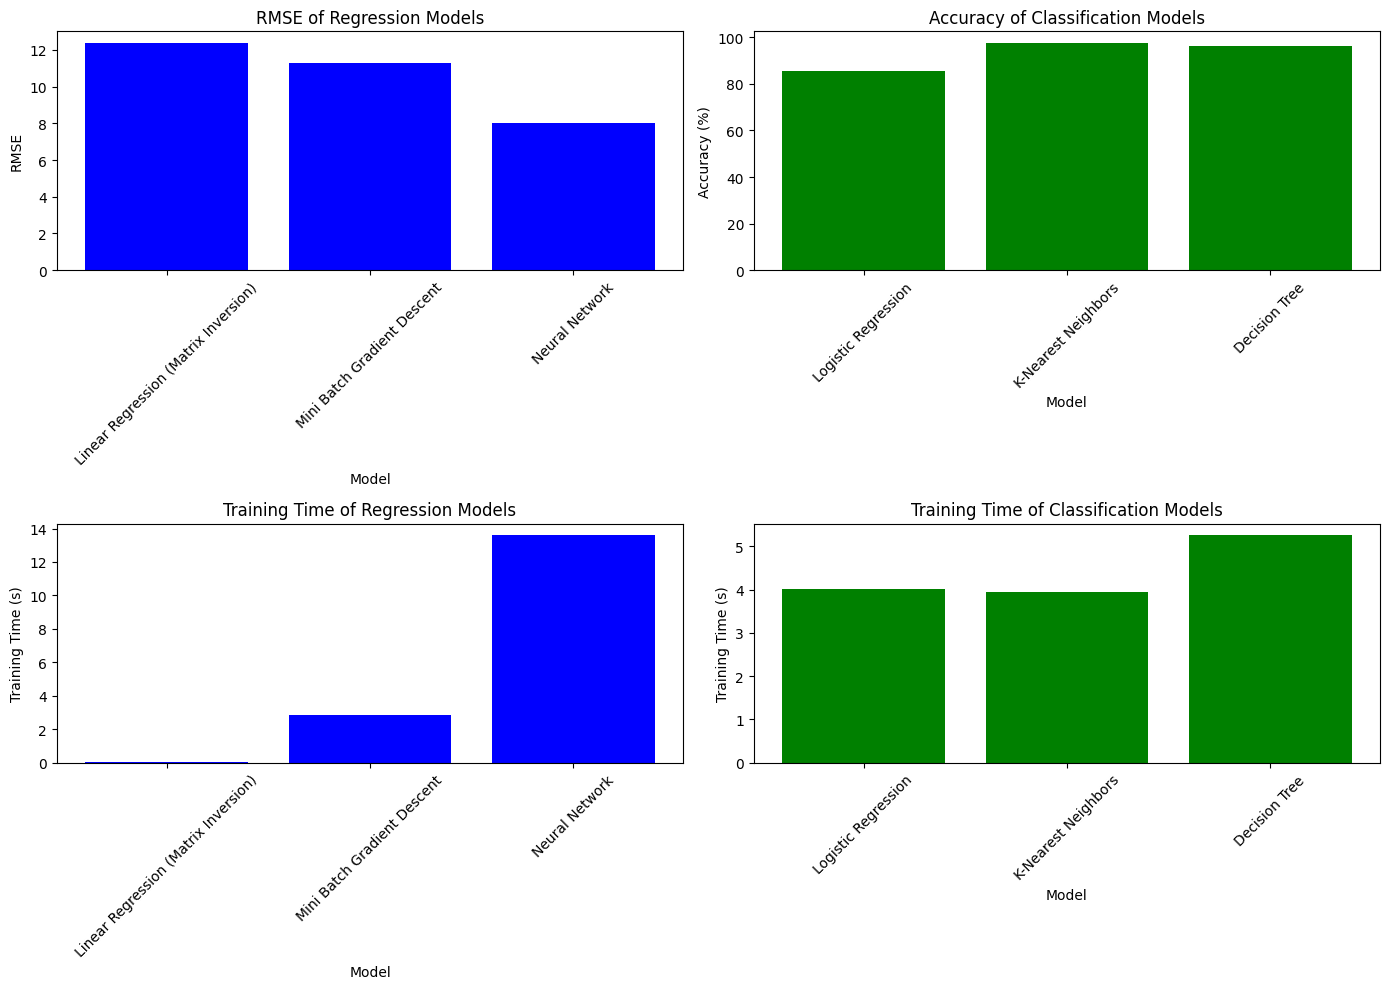

In [ ]:
model_performance = [
    # Modelli di regressione
    {'Model': 'Linear Regression (Matrix Inversion)', 'Type': 'Regression', 'RMSE': rmse_mat, 'Training Time': training_time_mat},
    {'Model': 'Mini Batch Gradient Descent', 'Type': 'Regression', 'RMSE': rmse_gd, 'Training Time': training_time_gd},
    {'Model': 'Neural Network', 'Type': 'Regression', 'RMSE': rmse_nn, 'Training Time': training_time_nn},

    # Modelli di classificazione
    {'Model': 'Logistic Regression', 'Type': 'Classification', 'Training Time': training_time_log, 'Accuracy': acc_log},
    {'Model': 'K-Nearest Neighbors', 'Type': 'Classification', 'Training Time': training_time_knn, 'Accuracy': acc_knn},
    {'Model': 'Decision Tree', 'Type': 'Classification', 'Training Time': training_time_tree, 'Accuracy': acc_tree*100},
]

results_df = pd.DataFrame(model_performance)

regression_df = results_df[results_df['Type'] == 'Regression']
classification_df = results_df[results_df['Type'] == 'Classification']

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Prima colonna - Modelli di regressione
axs[0, 0].bar(regression_df['Model'], regression_df['RMSE'], color='blue')
axs[0, 0].set_title('RMSE of Regression Models')
axs[0, 0].set_xlabel('Model')
axs[0, 0].set_ylabel('RMSE')
axs[0, 0].tick_params(axis='x', rotation=45)

axs[1, 0].bar(regression_df['Model'], regression_df['Training Time'], color='blue')
axs[1, 0].set_title('Training Time of Regression Models')
axs[1, 0].set_xlabel('Model')
axs[1, 0].set_ylabel('Training Time (s)')
axs[1, 0].tick_params(axis='x', rotation=45)

# Seconda colonna - Modelli di classificazione
axs[0, 1].bar(classification_df['Model'], classification_df['Accuracy'], color='green')
axs[0, 1].set_title('Accuracy of Classification Models')
axs[0, 1].set_xlabel('Model')
axs[0, 1].set_ylabel('Accuracy (%)')
axs[0, 1].tick_params(axis='x', rotation=45)

axs[1, 1].bar(classification_df['Model'], classification_df['Training Time'], color='green')
axs[1, 1].set_title('Training Time of Classification Models')
axs[1, 1].set_xlabel('Model')
axs[1, 1].set_ylabel('Training Time (s)')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()